# Ideell pendel

_Disse siste to oppgavene er kanskje litt utfordrende, men legg merke til at alt vi benytter oss av er ting vi allerede har lært så langt i kurset. Får du til disse kan du være godt fornøyd med egen innsats._

I [kapittel 3.6](../3_difflign/3_difflign_pendel.ipynb) av undervisningsmateriellet har du sett hvordan du kan bruke det du har lært om omskriving av andreordens differensialligninger til førsteordens systemer for å studere følgende ligning

$$ \theta'' + \omega^2 \sin(\theta) = 0, $$

som beskriver vinkelutslaget til en idealisert pendel over tid. Her er $\omega = \sqrt{g/l}$, hvor $g$ er tyngdeakselerasjonen og $l$ er lengden av pendelen.
For å gjøre det enkelt setter vi fra nå av $\omega = 1$.

Denne ligningen kan skrives som førsteordenssystemet

$$ \begin{align} \theta' &= \phi, \tag{1a} \\ \phi' &= -\sin(\theta). \tag{1b} \end{align} $$

### (Eksplisitt) Eulers metode

(Eksplisitt) Eulers metode for systemer,
$$ \boldsymbol{x}' = f(\boldsymbol{x}), $$

er gitt av

$$ \boldsymbol{x}_{n+1} = \boldsymbol{x}_n + h f(\boldsymbol{x}_n), \qquad n = 0,1,2,\dots $$

For systemet (1) blir det tilhørende ligningssystemet

$$ \begin{aligned} \theta_{n+1} &= \theta_n + h \phi_{n}, \\ \phi_{n+1} &= \phi_n - h \sin(\theta_{n}). \end{aligned} $$

La oss se på systemet (1) med en startkonfigurasjon hvor pendelen holdes vannrett til høyre og slippes fra ro; ikke helt ulikt tilfellet vi så i *Dynamikk i konstruksjoner*.
Dette svarer til startverdiene $\theta(0) = \pi/2$ og $\phi(0) = 0$.

Vi bruker (eksplisitt) Eulers metode, som angitt ovenfor, for å tilnærme løsningen av dette startverdiproblemet mellom $t=0$ og $t=8$ med $N=100$ steg.

Grunnen til at vi har valgt $t=8$ som sluttid er, som du vil se av plottene nedenfor, at dette er omtrent så lang tid det tar for pendelen å gjennomføre en svingning.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

T = 8 # slutt-tidspunkt
N = 100 # antall steg med Euler

h = T/N # skrittlengde
tn = np.linspace(0,T,N+1) # array med N+1 tidspunkter mellom 0 og T

theta0 = np.pi/2 # startvinkel
phi0 = 0 # startvinkelhastighet

theta_e = np.zeros(N+1) # array for å lagre verdier av theta for eksplisitt Euler
theta_e[0] = theta0 # sett startverdi

phi_e = np.zeros(N+1) # array for å lagre verdier av phi
phi_e[0] = phi0 # sett startverdi

# N steg med Eulers metode
for n in range(N):
    theta_e[n+1] = theta_e[n] + h*phi_e[n] # ny theta
    phi_e[n+1] = phi_e[n] - h*np.sin(theta_e[n]) # ny phi  

Text(0.5, 1.0, 'Vinkelhastighet $\\phi$')

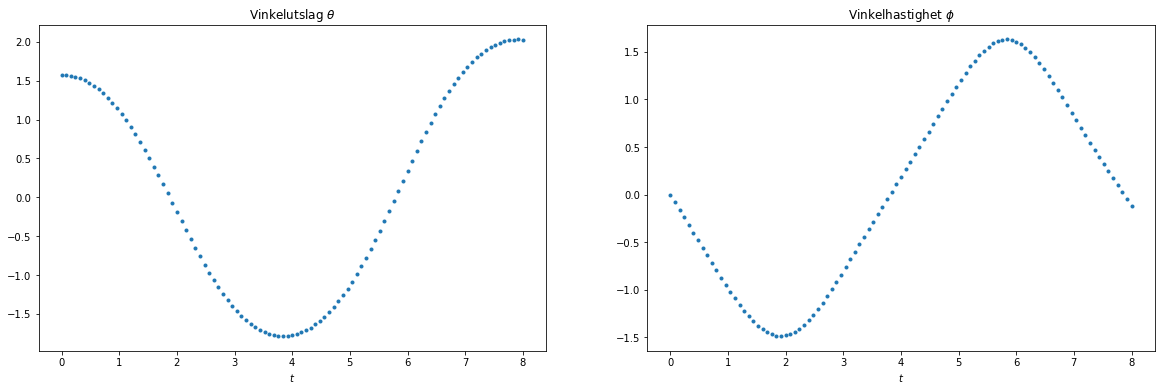

In [2]:
fig1, (ax11,ax12) = plt.subplots(1,2,figsize=(20,6)) # 1 figur, 2 plott

ax11.plot(tn,theta_e,'.') # plott vinkelutslag
ax11.set_xlabel(r'$t$') # navn på x-akse
ax11.set_title(r'Vinkelutslag $\theta$') # tittel

ax12.plot(tn,phi_e,'.') # plott vinkelhastighet
ax12.set_xlabel(r'$t$')
ax12.set_title(r"Vinkelhastighet $\phi$")

Legg merke til at vinkelutslaget ved $t=8$ er litt større enn det var ved $t=0$

Energien $E$ til pendelen ved tid $t$ kan uttrykkes som

$$ E(t) = \frac12 (\phi(t))^2 + 1 - \cos(\theta(t)). $$

For løsninger av systemet (1) skal denne energien være konstant over tid; det vil si at det er ingen endring av $E$ over tid: $E'(t) = 0$. Med våre startverdier $\theta(0) = \pi/2$ og $\phi(0) = 0$ har vi da $E(t) = E(0) = 1$. 
>Du kan selv prøve å derivere uttrykket ovenfor og bruke ligningene (1a) og (1b) til å vise at den tidsderiverte er null. Husk kjerneregelen $(f(g(x)))' = f'(g(x)) g'(x)$, og at $(\cos(x))' = -\sin(x)$.

For våre tilnærminger $(\theta_n,\phi_n)$ av løsningen $(\theta,\phi)$ på tidspunktene $t = t_n$ kan vi definere en tilhørende energi

$$ E_{n} = \frac12 \phi_n^2 + 1 - \cos(\theta_n). $$

Vi kan plotte denne energien $E_n$ og se at den øker over tid fra startverdien $E_0 = 1$.
Et konstant energinivå svarer til en lukket kurve i faseportrettet (et plott av $\theta$-verdiene mot $\phi$-verdiene), og fordi energien øker vil ikke tilnærmingene våre gi en lukket kurve.
>**Merk:** Betraktninger rundt energier og faseportretter er ikke pensum, men om du er interessert kan du se på [dette tilleggsnotatet](../3_difflign/3_difflign_pendel_fase.ipynb) for kapittel 3.6.

Text(0.5, 1.0, 'Faseportrett')

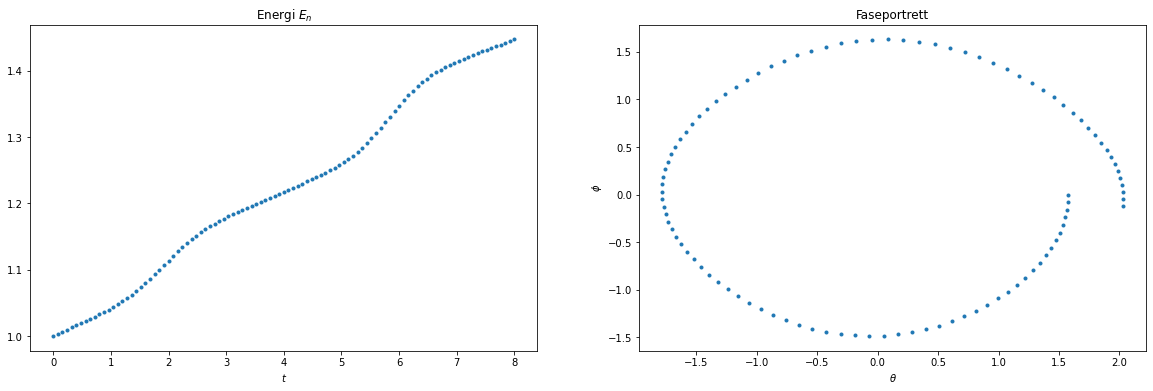

In [3]:
energi_e = 0.5*phi_e**2 + 1 - np.cos(theta_e) # tilnærmet energi

fig2, (ax21,ax22) = plt.subplots(1,2,figsize=(20,6)) # 1 figur, 2 plott
ax21.plot(tn,energi_e,'.') # plott energi
ax21.set_xlabel(r'$t$')
ax21.set_title(r'Energi $E_n$')

ax22.plot(theta_e,phi_e,'.') # plott faseportrett
ax22.set_xlabel(r'$\theta$')
ax22.set_ylabel(r"$\phi$")
ax22.set_title(r'Faseportrett')

## Implisitt Eulers metode: Euler + Newton = sant

I [kapittel 3.3](../3_difflign/3_difflign_stabilitet.ipynb) så vi at én mulighet for å unngå ustabile numeriske løsninger er å bruke *implisitt Eulers metode*,

$$ \boldsymbol{x}_{n+1} = \boldsymbol{x}_n + h f(\boldsymbol{x}_{n+1}), \qquad n = 0,1,2,\dots $$

I tilfellet hvor $x_n$ er en skalar og $f$ er lineær, $f(x) = ax + b$, kan vi i hvert steg løse for den ukjente skalaren $x_{n+1}$. \
Dette gjorde vi også i en av oppgavene i øving 3, da vi skrev om koden for eksplisitt Euler til implisitt Euler for et lineært problem.

Dette er temmelig likt for systemer hvor $\boldsymbol{x}_n$ er en vektor og $f$ er lineær, det vil si $f(\boldsymbol{x}) = A\boldsymbol{x} + \boldsymbol{b}$ for en matrise $A$ og en vektor $\boldsymbol{b}$. Da kan implisitt Eulers metode skrives som et lineært system,

$$ (I - hA)\boldsymbol{x}_{n+1} = \boldsymbol{x}_n + h \boldsymbol{b}, $$

hvor $I$ er identitetsmatrisen, det vil si, elementene langs diagonalen til $I$ er $1$, resten er $0$, slik at $I\boldsymbol{x} = \boldsymbol{x}$. \
I dette tilfellet ser vi at i hvert steg av implisitt Eulers metode kan vi løse dette lineære systemet for den ukjente vektoren $\boldsymbol{x}_{n+1}$, for eksempel ved bruk av `numpy.linalg.solve()`.

For generelle ikkelineære $f$, som typisk er det som dukker opp i praktiske sammenhenger, er ikke dette så enkelt. \
Da vil man typisk løse dette med å i hvert steg av Eulers metode benytte seg av Newtons metode for ikkelineære systemer av ligninger.
Disse metodene går vi ikke inn på i dette kurset, siden det ikke gir mye mening å se på slike uten en mer solid bakgrunn i lineær algebra.

Dersom vi benytter implisitt Eulers metode på systemet (1) får vi ligningene

$$ \begin{align} \theta_{n+1} &= \theta_n + h \phi_{n+1}, \tag{2a} \\ \phi_{n+1} &= \phi_n - h \sin(\theta_{n+1}). \tag{2b} \end{align} $$

For dette systemet med bare to ligninger kan vi faktisk slippe unna med å bruke Newtons metode for skalare ligninger, slik vi har lært i dette kurset.

### Oppgave a)

Si vi har verdiene $\theta_n$ og $\phi_n$ og ønsker å finne de neste verdiene $\theta_{n+1}$ og $\phi_{n+1}$.
Vi kan kombinere ligningene (2a) og (2b) for å bli kvitt den ukjente $\phi_{n+1}$. \
Da står vi igjen med en ikkelineær ligning for den ukjente $\theta_{n+1}$, som også inneholder de kjente størrelsene $\theta_n$, $\phi_n$ og skrittlengden $h$.

Hva er denne ligningen? Skriv den inn i CapQuiz.

### Oppgave b)

Ligningen ovenfor forteller oss at $\theta = \theta_{n+1}$ er en rot for en skalar funksjon $f = f(\theta)$ som avhenger av verdiene $\theta_n$, $\phi_n$ og $h$. Vi ønsker altså å løse ligningen $f(\theta) = 0$.

Da vet vi jo at vi kan bruke Newtons metode til å finne en god nok tilnærming for $\theta_{n+1}$, og verdien $\theta_n$ kan være en fornuftig startgjetning her. \
Med denne verdien kan vi så sette den inn i ligning (2b) for å finne $\phi_{n+1}$.


Fullfør funksjonen `theta_steg(theta_n,phi_n,h,tol=1e-3)` nedenfor som tar inn nåværende verdier `theta_n` og `phi_n`, skrittlengde `h` og en toleranse `tol` (med standardverdi $10^{-3}$) og returnerer en tilnærming `theta` av $\theta_{n+1}$. Avviket som måles skal være $|f(\theta)|$, slik at funksjonen returnerer første `theta` som oppfyller dette, gitt startgjetningen $\theta_n$.

In [ ]:
def theta_steg(theta_n,phi_n,h,tol=1e-3):
    
    def f(theta):
        # kan være lurt å definere f her
        return ?
    
    # din kode her
        
    return theta



Kall funksjonen `theta_steg(theta0,phi0,1)` for å beregne $\theta_1$ med skrittlengden $h=1$. Beregn deretter $\phi_1$. \
Fyll inn disse verdiene i CapQuiz med tre desimalers nøyaktighet.

## Implisitt Eulers metode for den ideelle pendelen

Her kan du bruke funksjonen `theta_steg()` til å utføre tilsvarende mange steg ($N=100$) med implisitt Eulers metode som vi gjorde med eksplisitt Eulers metode i begynnelsen.
Bruk toleransen `tol = 1e-6`.

In [ ]:
theta_i = np.zeros(N+1) # array for å lagre verdier av theta for implisitt Euler
theta_i[0] = theta0 # sett startverdi

phi_i = np.zeros(N+1) # array for phi
phi_i[0] = phi0

# din kode her

Skriv inn den fungerende koden din i CapQuiz. Husk å legge til `import numpy as np` i starten, og alle variablene du trenger, siden dette allerede er gjort her i feltene ovenfor.

Som en sjekk kan du plotte svaret ditt sammen med tilnærmingene vi fikk med eksplisitt Eulers metode.

In [ ]:
fig3, (ax31,ax32) = plt.subplots(1,2,figsize=(20,6))
ax31.plot(tn,theta_e,'.',label=r'Eksplisitt Euler')
ax31.plot(tn,theta_i,'x',label=r'Implisitt Euler')
ax31.legend()
ax31.set_xlabel(r'$t$')
ax31.set_title(r'Vinkelutslag $\theta$')

ax32.plot(tn,phi_e,'.',label=r'Eksplisitt Euler')
ax32.plot(tn,phi_i,'x',label=r'Implisitt Euler')
ax32.legend()
ax32.set_xlabel(r'$t$')
ax32.set_title(r"Vinkelhastighet $\phi$")

Hvis du har gjort det riktig bør figuren se [omtrent slik ut](Figurer/Ov4_pendel_sammenligning.png).

Her ser vi at løsningen vi får med implisitt Euler gir vinkelutslag som avtar over tid.
Dette er fordi implisitt Euler har motsatt problem av eksplisitt Euler; den mister energi over tid.

Dette kan vi se ved å plotte energien $E_n$ og faseportrettene for de to tilnærmingene mot hverandre. Det bør se [omtrent slik ut](Figurer/Ov4_pendel_energi.png).

In [ ]:
energi_i = 0.5*phi_i**2 + 1 - np.cos(theta_i)

fig4, (ax41,ax42) = plt.subplots(1,2,figsize=(20,6))
ax41.plot(tn,energi_e,'.',label=r'Eksplisitt Euler')
ax41.plot(tn,energi_i,'x',label=r'Implisitt Euler')
ax41.legend()
ax41.set_xlabel(r'$t$')
ax41.set_title(r'Energi $E_n$')

ax42.plot(theta_e,phi_e,'.',label=r'Eksplisitt Euler')
ax42.plot(theta_i,phi_i,'x',label=r'Implisitt Euler')
ax42.legend()
ax42.set_xlabel(r'$\theta$')
ax42.set_ylabel(r"$\phi$")
ax42.set_title(r'Faseportrett')

Den lukkede kurven for den eksakte løsningen $(\theta(t), \phi(t))$ for $0 \le t \le 8$, hvor energien $E(t) \equiv 1$, vil ligge mellom disse spiralene i faseportrettet.

>**Merk:** Igjen, dette er ikke pensum, men for de interesserte finnes [dette tilleggsnotatet](../3_difflign/3_difflign_pendel_metoder.ipynb) for kapittel 3.6 som inkluderer en tredje Euler-metode med bedre stabilitetsegenskaper for denne typen systemer.